In [296]:
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns

In [297]:
dados_vendas_dict = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}
base = pd.DataFrame(dados_vendas_dict);

base

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600
5,Junho,2700
6,Julho,2800
7,Agosto,2900
8,Setembro,3000
9,Outubro,3100


In [298]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     12 non-null     object
 1   vendas  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [299]:
base['mes'].count(), base['mes'].unique()


(np.int64(12),
 array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
        'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
       dtype=object))

In [300]:
base['vendas'].min(), base['vendas'].max()

(np.int64(2000), np.int64(3300))

In [301]:
base['vendas'].mean(), base['vendas'].median()

(np.float64(2716.6666666666665), np.float64(2750.0))

In [302]:
meses = {
    'Janeiro':1, 'Fevereiro':2, 'Março':3, 'Abril':4, 'Maio':5, 'Junho':6, 'Julho':7, 'Agosto':8, 'Setembro':9, 'Outubro':10, 'Novembro':11, 'Dezembro':12
}

base['mes_numero'] = base['mes'].map(meses)

In [303]:
correlacao = base.select_dtypes(include=['float64', 'int64']).corr()
# sns.heatmap(correlacao, vmin=-1, vmax=1, annot=True)

array([[<Axes: xlabel='vendas', ylabel='vendas'>,
        <Axes: xlabel='mes_numero', ylabel='vendas'>],
       [<Axes: xlabel='vendas', ylabel='mes_numero'>,
        <Axes: xlabel='mes_numero', ylabel='mes_numero'>]], dtype=object)

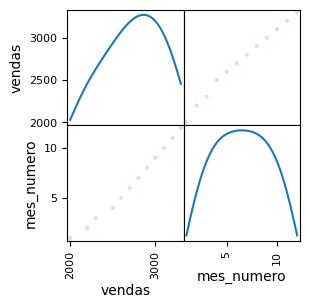

In [304]:
pd.plotting.scatter_matrix(base, alpha=0.2, figsize=(3,3), diagonal='kde')

array([[<Axes: title={'center': 'vendas'}>,
        <Axes: title={'center': 'mes_numero'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

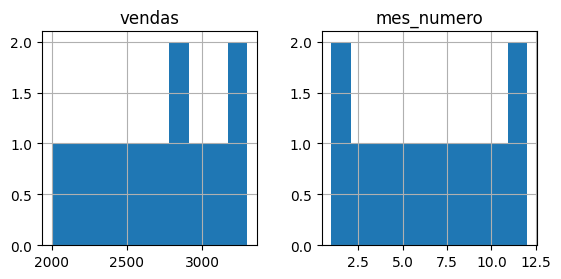

In [305]:
base.hist(layout=(3,3), figsize=(10,10))

In [306]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [307]:
# Modelo
X = base.drop(columns=['mes', 'vendas'])
y = base['vendas']

X, y

(    mes_numero
 0            1
 1            2
 2            3
 3            4
 4            5
 5            6
 6            7
 7            8
 8            9
 9           10
 10          11
 11          12,
 0     2000
 1     2200
 2     2300
 3     2500
 4     2600
 5     2700
 6     2800
 7     2900
 8     3000
 9     3100
 10    3200
 11    3300
 Name: vendas, dtype: int64)

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=51)


,mes_numero
3,4
7,8
2,3
6,7
1,2
4,5
8,9
11,12
10,11
0,1


In [309]:
# Treinar o algoritimo de Regressao Linear
model_1 = LinearRegression().fit(X_train, y_train)

In [310]:
# Gerar Predicoes do conjunto de testes com base no Modelo
y_pred = model_1.predict(X_test)

In [311]:
model_1.coef_, model_1.intercept_

(array([100.]), np.float64(2100.0))

In [312]:
model_1.score(X_train, y_train)

1.0

In [313]:
mean_absolute_error(y_test, y_pred)

np.float64(40.00000000000004)

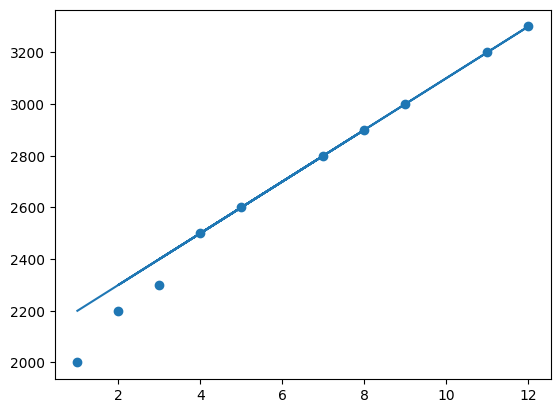

In [314]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)

# plt.plot(X_test, y_pred, color='k')

In [328]:
previsao_dezembro = model_1.predict([[12]])
round(previsao_dezembro[0], 2)

/root/.local/share/virtualenvs/linear-regression-wjcQupOh/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(3300.0)